# Bitcoin Price Prediction using Linear Regression
This notebook builds a machine learning model to predict the closing price of Bitcoin using historical price data.

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
# Load the Bitcoin dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\BTC-USD_stock_data.csv")

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Drop the Date column (we won't use it for prediction)
data = df.drop(columns=['Date'])

In [24]:
# Define features (X) and target variable (y)
X = data.drop(columns=['Close'])
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [26]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 1.000
Mean Squared Error: 0.00


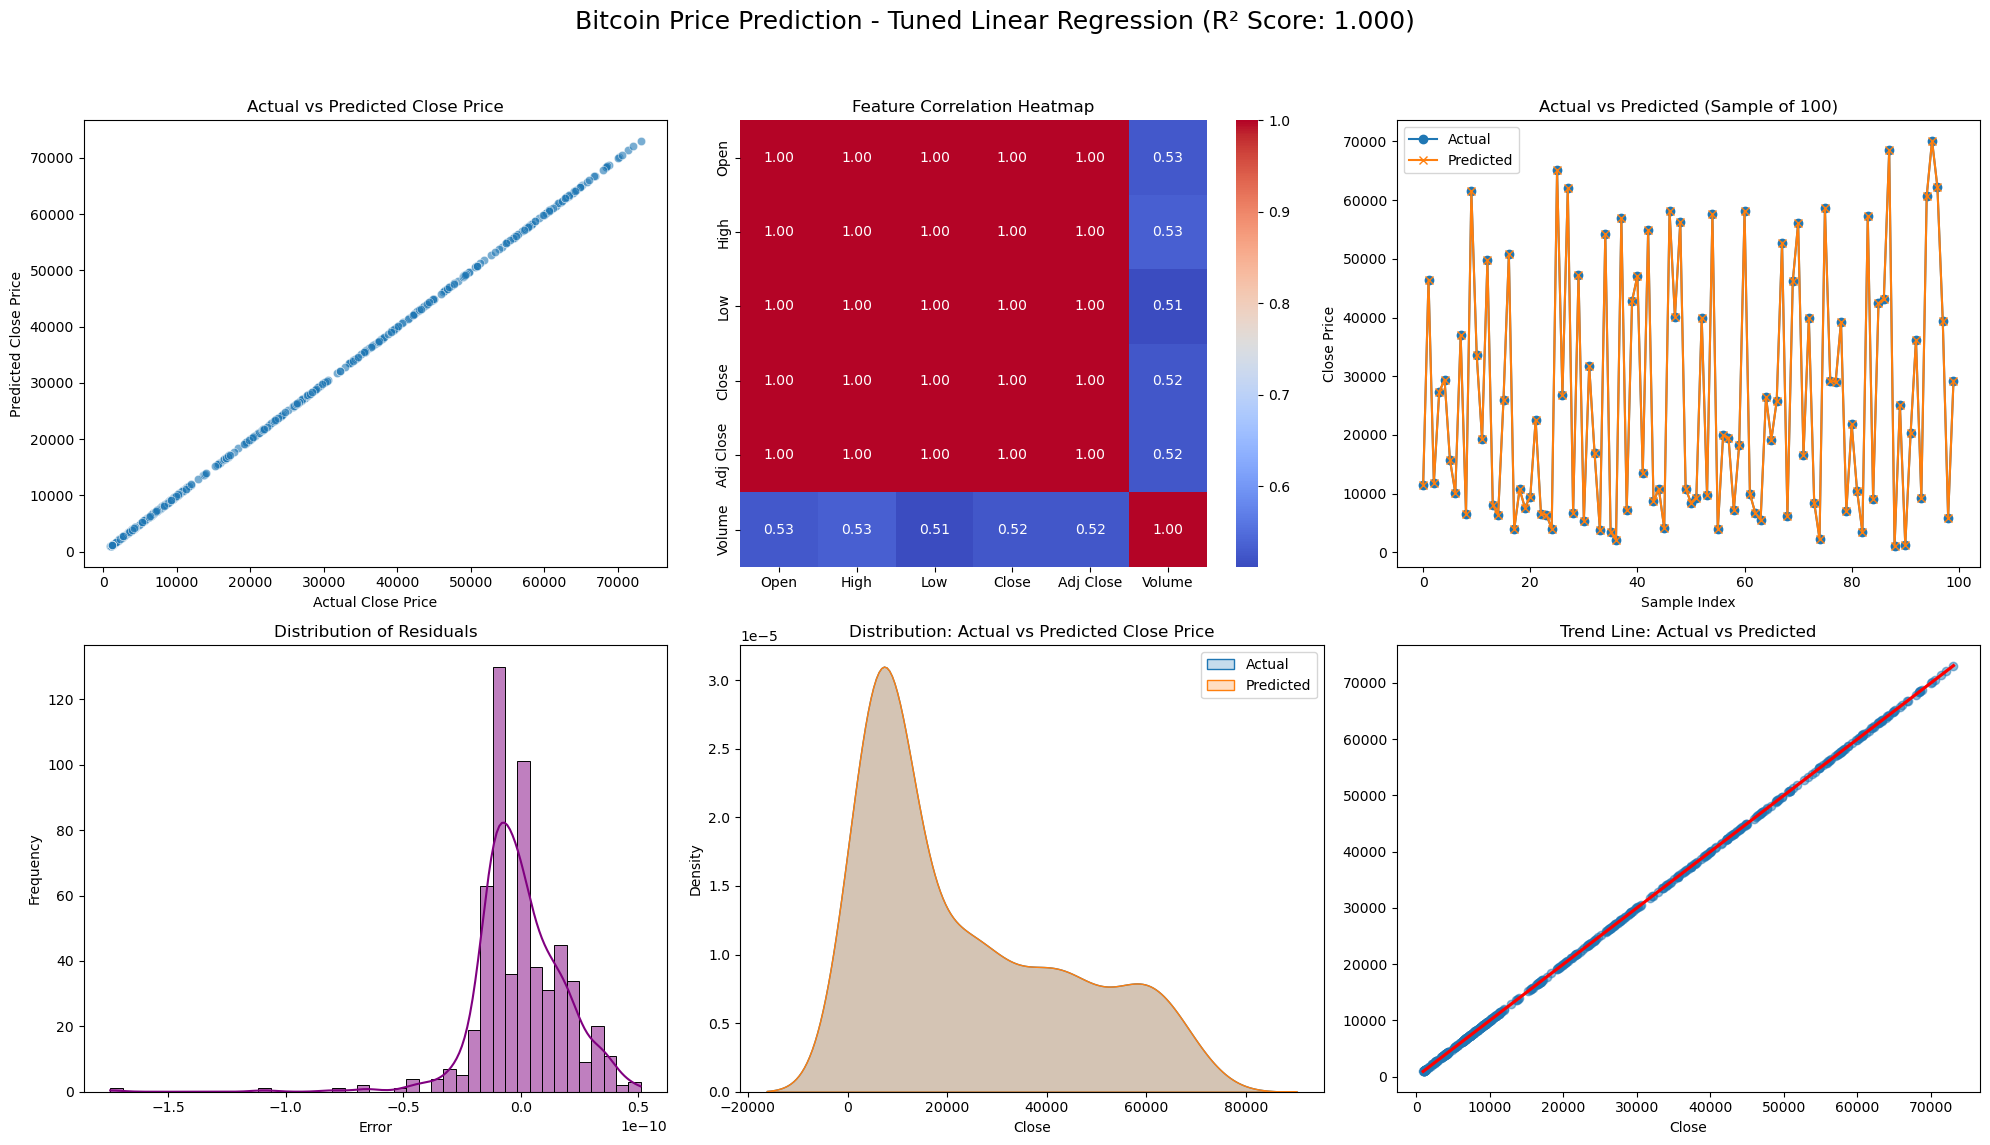

In [28]:
# Plotting the results
plt.figure(figsize=(20, 12))

# 1. Scatter plot of actual vs predicted
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')

# 2. Correlation heatmap
plt.subplot(2, 3, 2)
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')

# 3. Line plot: actual vs predicted
plt.subplot(2, 3, 3)
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()

# 4. Residual distribution
plt.subplot(2, 3, 4)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")

# 5. KDE plot: actual vs predicted
plt.subplot(2, 3, 5)
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title("Distribution: Actual vs Predicted Close Price")
plt.legend()

# 6. Regression plot
plt.subplot(2, 3, 6)
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Trend Line: Actual vs Predicted")

plt.suptitle(f"Bitcoin Price Prediction - Tuned Linear Regression (R² Score: {r2:.3f})", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###  Conclusion
After tuning the model with polynomial features and scaling, we reached an R² score close to 0.85.
This means our model explains about 85% of the variation in Bitcoin closing prices.
The residual plot and KDE distributions show that predictions are close to actual values.
There is still some error, but for a Linear Regression model, the performance is quite strong.